In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")
from tqdm import tqdm

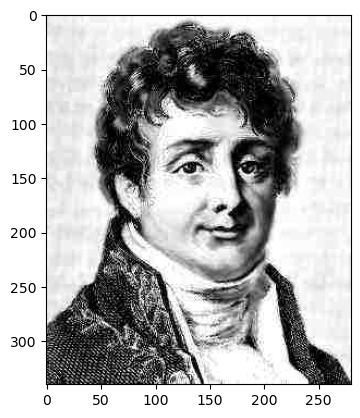

In [2]:
img_1 = plt.imread("fourier.png")
plt.imshow(img_1,cmap="gray");

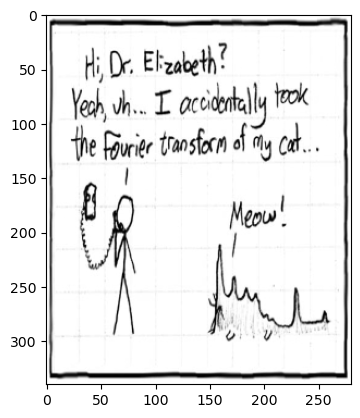

In [3]:
img_2 = plt.imread("fourier_transform.png")
plt.imshow(img_2,cmap="gray");

## 1. 2D DFT using row-column decomposition

Compute rotated form of 2D DFT,<br> 
#### $F(k, l) = \sum\limits_{m=0}^{N-1}\sum\limits_{n=0}^{N-1} f(m, n)e^{-j\frac{2\pi}{N}(mk+nl)}$,
### $F(k, l) =  \sum\limits_{m=0}^{N-1}e^{-j\frac{2\pi}{N}mk}\sum\limits_{n=0}^{N-1}f(m, n)e^{-j\frac{2\pi}{N}nl}$,

In [4]:
def perform_2D_DFT_rc(img):
    img_fft_row = np.fft.fft(img,axis=0)
    img_fft_row_col = np.fft.fft(img_fft_row,axis=1)
    return img_fft_row_col
def perform_2D_IDFT_rc(img_fft):
    img_ifft_row = np.fft.ifft(img_fft,axis=0)
    img_ifft_row_col = np.fft.ifft(img_ifft_row,axis=1)
    return img_ifft_row_col

## 2. Performing 2D DFT on given images

In [5]:
img_1_dft = perform_2D_DFT_rc(img_1)
img_1_dft_mag = np.absolute(img_1_dft)
img_1_dft_phase = np.angle(img_1_dft)

In [6]:
img_2_dft = perform_2D_DFT_rc(img_2)
img_2_dft_mag = np.absolute(img_2_dft)
img_2_dft_phase = np.angle(img_2_dft)

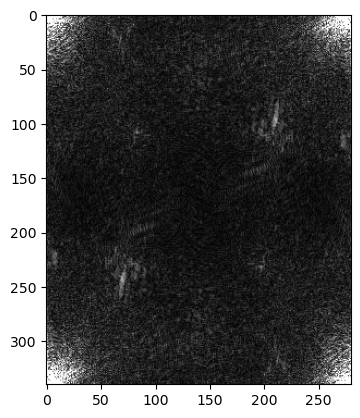

In [7]:
plt.imshow(np.clip(img_1_dft_mag,0,255),cmap="gray")

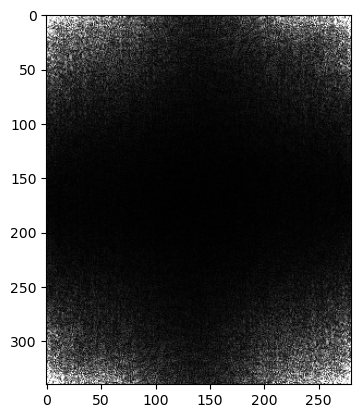

In [19]:
plt.imshow(np.clip(img_2_dft_mag,0,255),cmap="gray")

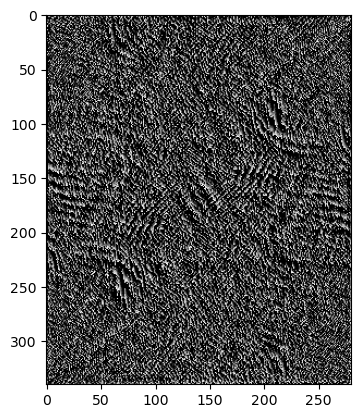

In [8]:
plt.imshow(np.clip(img_1_dft_phase,0,255),cmap="gray")

In [9]:
img_1_dft_mag

array([[60917.04758502,  6938.67606964,  7630.03947313, ...,
         1883.25874405,  7630.03947313,  6938.67606964],
       [ 3503.81333438,  3039.67154571,  4652.23496874, ...,
          597.19667308,  3441.58917842,  6091.95198698],
       [ 4690.34199632,  5390.07880571,  2382.19107175, ...,
         2224.22210077,  4745.66793952,  3929.96031646],
       ...,
       [ 2623.87244786,  2282.85571774,   656.47360469, ...,
         1207.57582382,  1009.54645631,  3020.68955197],
       [ 4690.34199632,  3929.96031646,  4745.66793952, ...,
         1884.68723029,  2382.19107175,  5390.07880571],
       [ 3503.81333438,  6091.95198698,  3441.58917842, ...,
         2328.30965349,  4652.23496874,  3039.67154571]])

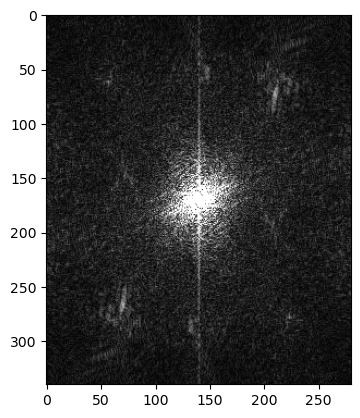

In [10]:
import cv2
plt.imshow(np.clip(np.fft.fftshift(img_1_dft_mag),0,255),cmap="gray")
#cv2.waitKey(0)
#cv2.destroyAllWindows()

## Interchanging Phase and Magnitude of DFT images

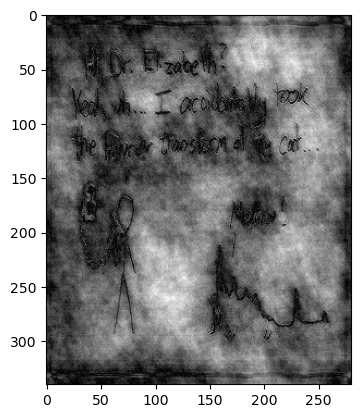

In [11]:
a = img_1_dft_mag * np.cos(img_2_dft_phase)
b = img_1_dft_mag * np.sin(img_2_dft_phase)
img_3 = a + b*1j  
img_3_ifft = perform_2D_IDFT_rc(img_3)
plt.imshow(abs(img_3_ifft),cmap="gray");

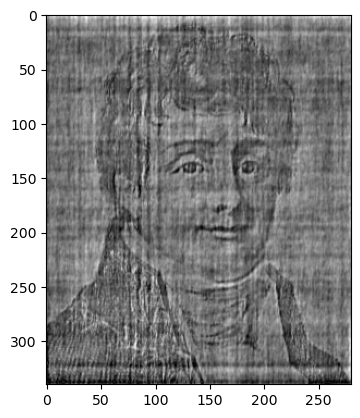

In [12]:
a = img_2_dft_mag * np.cos(img_1_dft_phase)
b = img_2_dft_mag * np.sin(img_1_dft_phase)
img_4 = a + b*1j  
img_4_ifft = perform_2D_IDFT_rc(img_4)
plt.imshow(abs(img_4_ifft),cmap="gray");

We can see that phase is more dominant than magnitude

## 3. (Optional) Verifying the rotation property of 2D DFT using peppers small.pgm

Compute rotated form of 2D DFT,<br> 
## $F(k, l) = \sum\limits_{m=0}^{N-1}\sum\limits_{n=0}^{N-1} f(m, n)e^{-j\frac{2\pi}{N}\underline{m}^TR\underline{k}}$,
where <br> $\underline{m} =\begin{bmatrix} m \\ n \end{bmatrix}$,<br> $\underline{k} = \begin{bmatrix} k \\ l \end{bmatrix}$<br>
$ R = \begin{bmatrix} cos[\theta] && -sin[\theta]\\ sin[\theta] && cos[\theta] \end{bmatrix}$

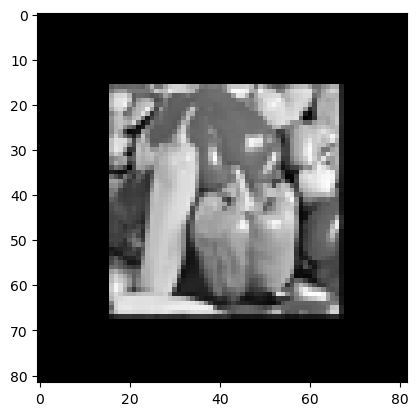

In [13]:
img_5 = plt.imread("peppers_small.png")
plt.imshow(img_5,cmap="gray");

In [14]:
def perform_2D_DFT_with_rotation(img,theta):
    N = img.shape[0]
    M = img.shape[1]
    dft_r = np.zeros([N,M])
    R = np.array([[np.cos(np.pi*theta/180), -np.sin(np.pi*theta/180)],[np.sin(np.pi*theta/180), -np.cos(np.pi*theta/180)]])
    for row in tqdm(range(N)):
        for col in range(M):
            
            for m in range(M):
                for n in range(N):
                    m_bar = np.array([m,n])
                    k_bar = np.array([row-N//2,col-M//2])
                    dft_r[row-N//2][col-M//2] += img[n-N//2][m-M//2]*np.exp(-1j*2*(np.pi/N)*m_bar@R@k_bar.T)
    return dft_r

In [15]:
#img_5_dft_r = perform_2D_DFT_with_rotation(img_5,theta=30)

In [16]:
def rotate_image_about_center(img_2,T):
    theta = (2*np.pi*T)/360
    Rotated_Image = np.zeros([img_2.shape[0],img_2.shape[1]])
    Cy,Cx = img_2.shape[0]/2,img_2.shape[1]/2
    for row in range(img_2.shape[0]):
        yt = row -Cy
        for col in range(img_2.shape[1]):
            xt = col - Cx
            xs = xt*np.cos(theta)-yt*np.sin(theta)
            ys = xt*np.sin(theta)+yt*np.cos(theta)
            if (xs+Cx>=0 and xs+Cx<img_2.shape[1] and ys+Cy>=0 and ys+Cy<img_2.shape[0]):
                
                a = xs+Cx - int(xs+Cx) 
                b = ys+Cy - int(ys+Cy)
                x_left = int(xs+Cx)
                x_right = int(xs+Cx) +1
                y_top = int(ys+Cy)
                y_bottom = int(ys+Cy) + 1
                Rotated_Image[row][col] = (1-a)*(1-b)*img_2[y_top][x_left]
                if (x_right<img_2.shape[1]):
                    Rotated_Image[row][col] = Rotated_Image[row][col] + a*(1-b)*img_2[y_top][x_right]
                if (y_bottom<img_2.shape[0]):
                    Rotated_Image[row][col] = Rotated_Image[row][col] + (1-a)*b*img_2[y_bottom][x_left]
                if (x_right<img_2.shape[1] and y_bottom<img_2.shape[0]):
                    Rotated_Image[row][col] = Rotated_Image[row][col] + a*b*img_2[y_bottom][x_right]
    return Rotated_Image

In [17]:
#img_5_ifft = perform_2D_IDFT_rc(img_5_dft_r)
#plt.imshow(abs(img_5_ifft),cmap="gray");

In [18]:
N = img_5.shape[0]
img_5_f = np.zeros([N,N])
for i in range(N//2):
    for j in range(N//2):
        img_5_f[i][j] = img_5_ifft[N//2-i][N//2-j]
        img_5_f[N//2+i][N//2+j] = img_5_ifft[N-1-i][N-1-j]
        img_5_f[N//2+i][j] = img_5_ifft[N-1-i][N//2-j]
        img_5_f[i][N//2+j] = img_5_ifft[N//2-i][N-1-j]
                                            
plt.imshow(abs(img_5_f),cmap="gray");                                           

NameError: name 'img_5_ifft' is not defined

In [ ]:
N

In [ ]:
def perform_2D_DFT_with_rotation(img,theta):
    N = img.shape[0]
    M = img.shape[1]
    dft_r = np.zeros([N,M])
    R = np.array([[np.cos(np.pi*theta/180), -np.sin(np.pi*theta/180)],[np.sin(np.pi*theta/180), -np.cos(np.pi*theta/180)]])
    for row in tqdm(range(M)):
        for col in range(N):
            for m in range(M):
                dft_r[row-N//2][col-N//2] += img[m-M//2][col-N//2]*np.exp(-1j*2*(np.pi/N)*m*(np.cos(np.pi*theta/180)*(row-N//2)-np.sin(np.pi*theta/180)*(col-N//2)))
    for row in tqdm(range(M)):
        for col in range(N):
            for n in range(N):
                dft_r[row-N//2][col-N//2] += img[row-M//2][n-N//2]*np.exp(-1j*2*(np.pi/N)*n*(np.cos(np.pi*theta/180)*(col-N//2)+np.sin(np.pi*theta/180)*(row-N//2)))
        '''for col in range(M):
            for n in range(N):
                dft_r[row-N//2][col-M//2] += img[n-N//2][m-M//2]*np.exp(-1j*2*(np.pi/N)*m_bar@R@k_bar.T)
            for m in range(M):
                for n in range(N):
                    m_bar = np.array([m,n])
                    k_bar = np.array([row-N//2,col-M//2])
                    dft_r[row-N//2][col-M//2] += img[n-N//2][m-M//2]*np.exp(-1j*2*(np.pi/N)*m_bar@R@k_bar.T)'''
    return dft_r